Import Dependencies

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle




Inspection of Data

In [19]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [20]:
df.shape

(7043, 21)

In [21]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [23]:
## Dropping customerID column as it is not useful for prediction
df = df.drop(columns='customerID')

In [24]:
df.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [25]:
## Unique values in each column

numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in df.columns:
    if col not in numerical_cols:
        print(col, df[col].unique())  
        print(" " * 50)
    

gender ['Female' 'Male']
                                                  
SeniorCitizen [0 1]
                                                  
Partner ['Yes' 'No']
                                                  
Dependents ['No' 'Yes']
                                                  
PhoneService ['No' 'Yes']
                                                  
MultipleLines ['No phone service' 'No' 'Yes']
                                                  
InternetService ['DSL' 'Fiber optic' 'No']
                                                  
OnlineSecurity ['No' 'Yes' 'No internet service']
                                                  
OnlineBackup ['Yes' 'No' 'No internet service']
                                                  
DeviceProtection ['No' 'Yes' 'No internet service']
                                                  
TechSupport ['No' 'Yes' 'No internet service']
                                                  
StreamingTV ['No' 'Yes' 'No internet 

In [26]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [27]:
## Changing column type of TotalCharges to float
len(df[df['TotalCharges'] == ' '])

11

In [28]:
df['TotalCharges'] = df['TotalCharges'].replace({' ': '0.0'})

In [29]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


Exploratory Data Analysis (EDA)

In [31]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [32]:
## Distribution of Numerical features
def plot_histogram(df, column):
    plt.figure(figsize=(6, 4))
    sns.histplot(df[column],kde=True)
    plt.title(f'Histogram of {column}')
    
    col_mean = df[column].mean()
    col_median = df[column].median()
    
    plt.axvline(x=col_mean, color='red', linestyle='--', label='Mean')
    plt.axvline(x=col_median, color='green', linestyle='-', label='Median')
    
    plt.legend()
    plt.show()

C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


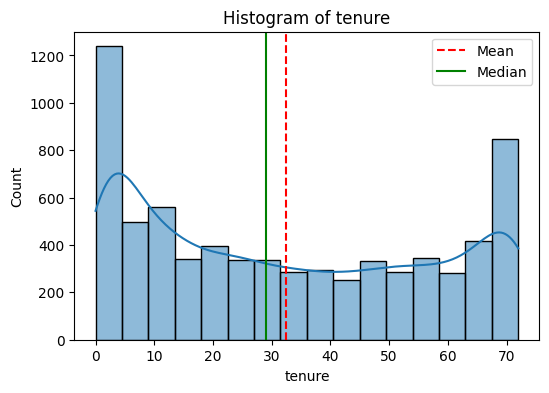

In [33]:
plot_histogram(df, 'tenure')

C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


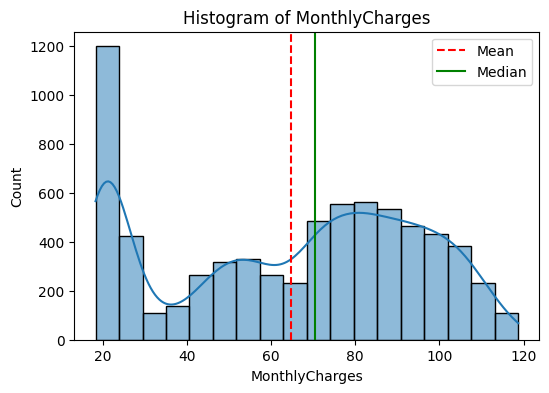

In [34]:
plot_histogram(df, 'MonthlyCharges')

C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


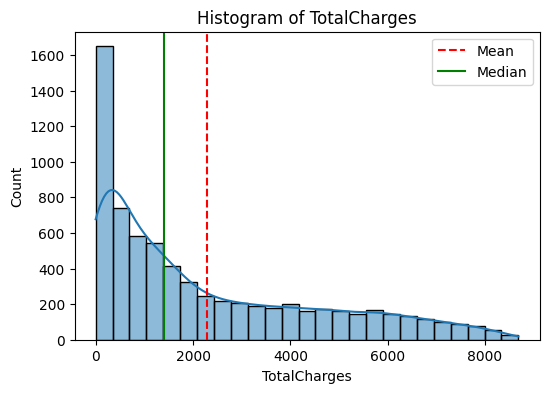

In [35]:
plot_histogram(df, 'TotalCharges')

In [36]:
## Box Plot for numerical features:
def box_plot(df,column_name):
    plt.figure(figsize=(6, 4))
    sns.boxplot(y = df[column_name])
    plt.title(f'Boxplot of {column_name}')
    
    plt.ylabel(column_name)
    plt.show()

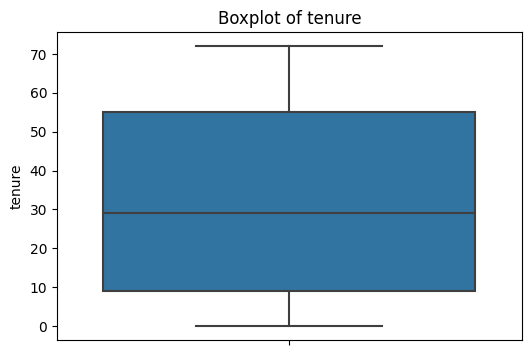

In [37]:
box_plot(df , 'tenure')

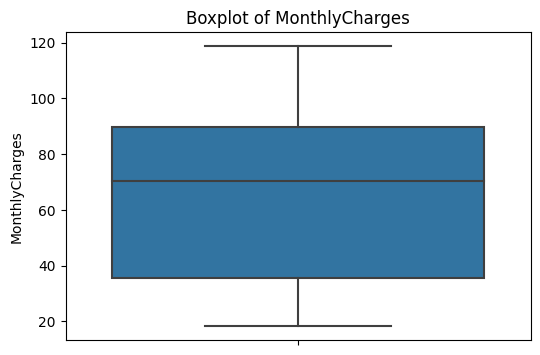

In [38]:
box_plot(df , 'MonthlyCharges')

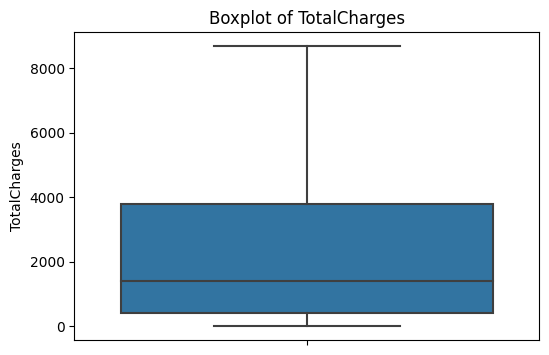

In [39]:
box_plot(df , 'TotalCharges')

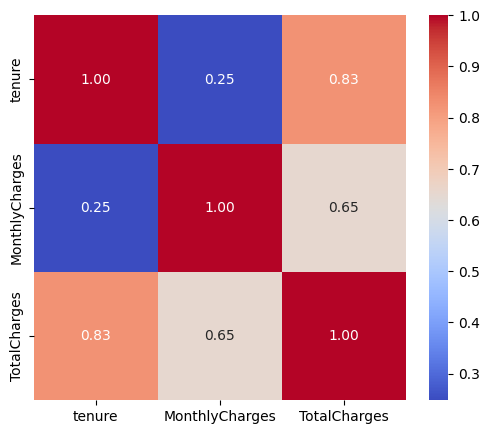

In [40]:
## Corelation between numerical features    
plt.figure(figsize=(6, 5))

sns.heatmap(df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr(), annot=True, cmap='coolwarm',fmt='.2f')
plt.show
plt.savefig("Corr_between_numerical_columns.png")

Categorical Features - Analysis

In [41]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


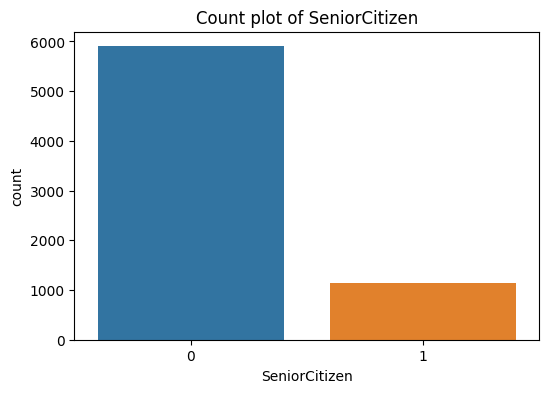

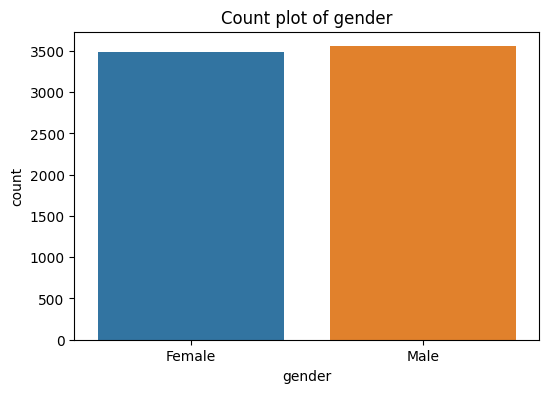

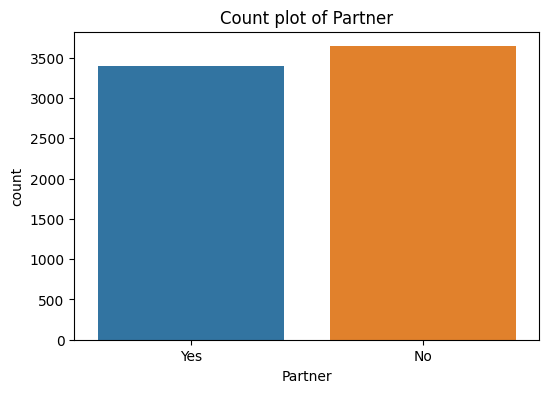

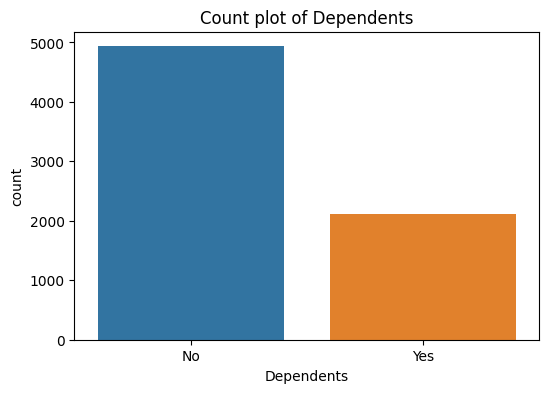

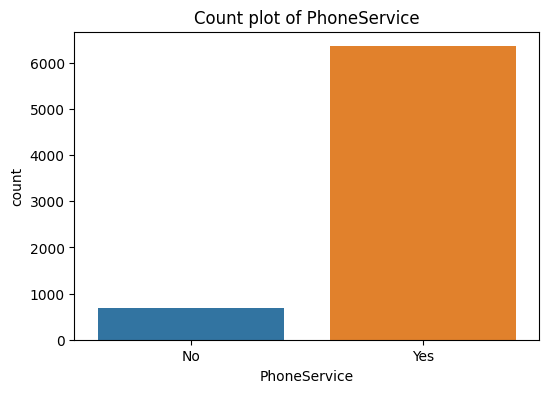

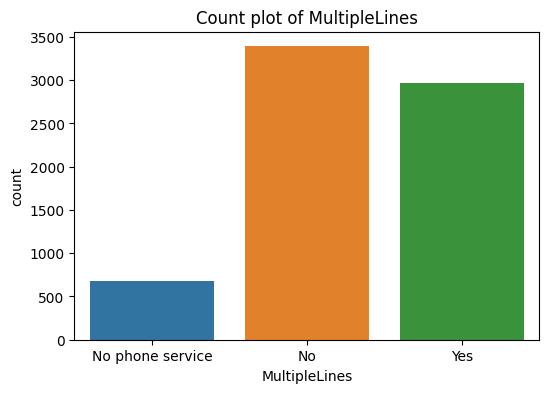

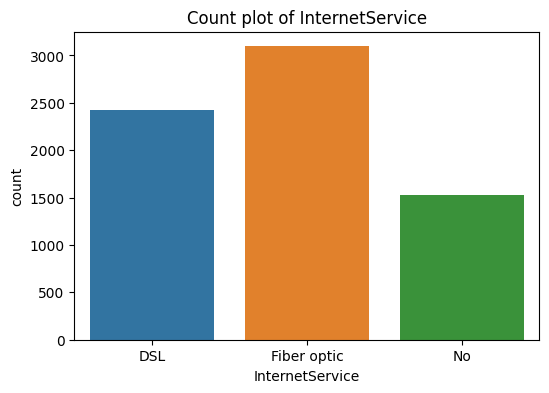

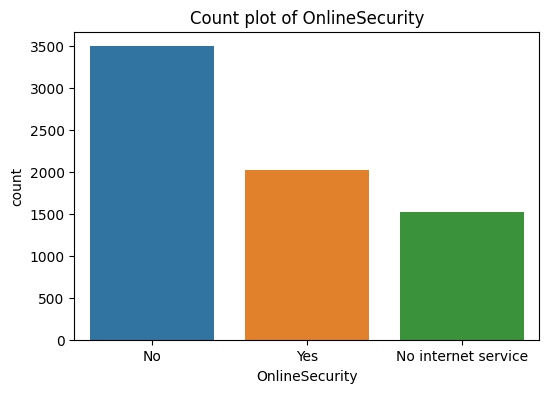

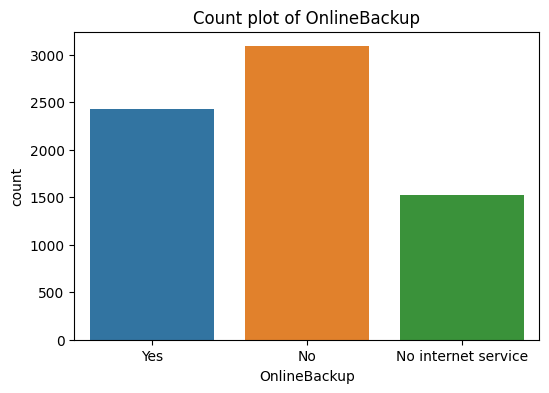

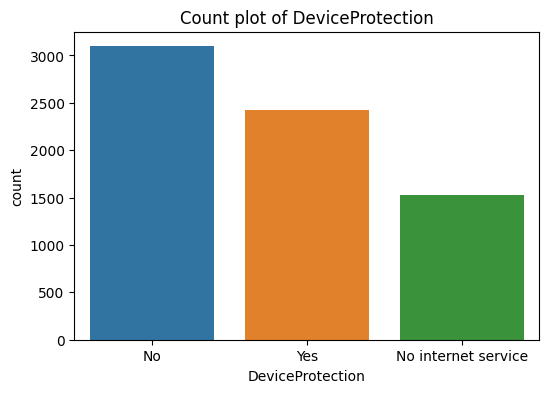

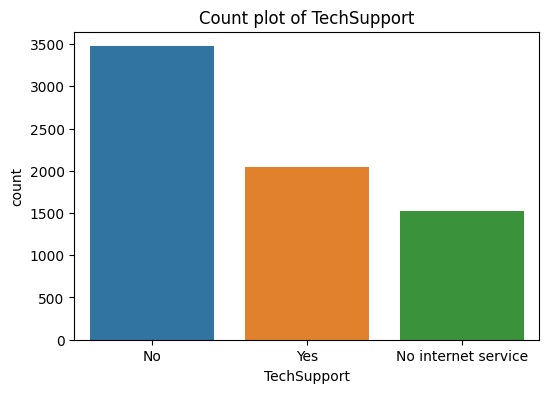

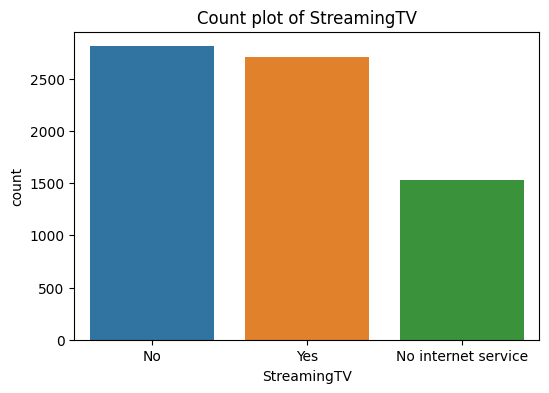

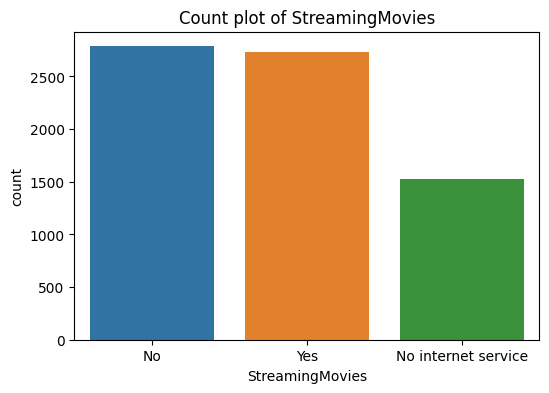

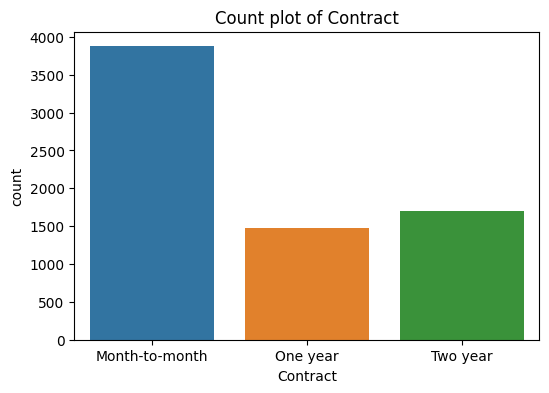

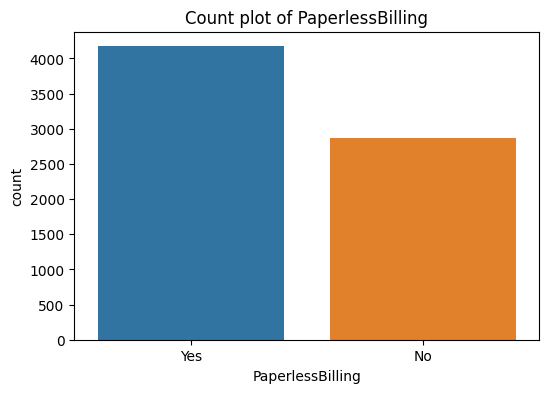

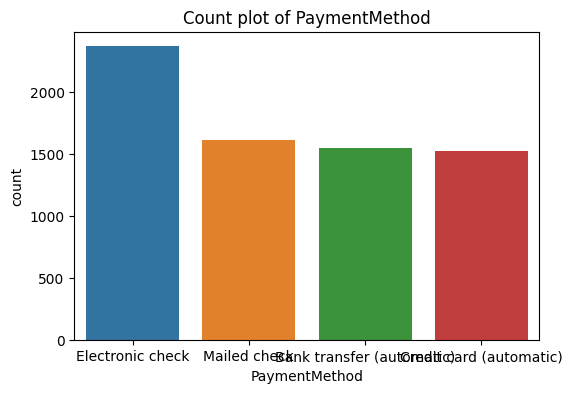

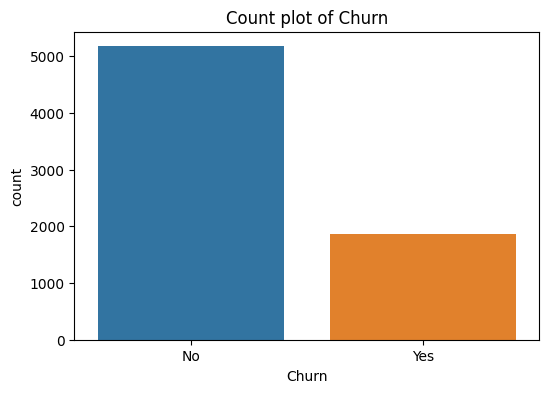

In [43]:
object_columns = df.select_dtypes(include=['object']).columns.to_list()

object_columns = ['SeniorCitizen'] + object_columns

for col in object_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col)
    plt.title(f'Count plot of {col}')
    plt.show()

Data Preprocessing

In [44]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [45]:
## Local label encoding to Target column
df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})

In [46]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1


In [47]:
print(df['Churn'].value_counts())

Churn
0    5174
1    1869
Name: count, dtype: int64


Label Encoding of Categorical Features

In [48]:
object_col = df.select_dtypes(include=['object']).columns.to_list()

object_col

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [49]:
## Initialize the dictionary to store the encoded values
encoders = {}

for col in object_col:
    label_encoder = LabelEncoder()
    df[col] = label_encoder.fit_transform(df[col])
    encoders[col] = label_encoder
    

## Save the encoders to a pickle file
with open('encoders.pkl', 'wb') as f:
    pickle.dump(encoders, f)

In [50]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [51]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1


Training and Testing data splits

In [52]:
x = df.drop(columns=['Churn'])
y = df['Churn']

In [53]:
x.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15


In [54]:
## Train Test Split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [55]:
print(y_train.value_counts())

Churn
0    4138
1    1496
Name: count, dtype: int64


In [56]:
y_train.shape

(5634,)

SMOTE to balance dataset

In [57]:
smote = SMOTE(random_state=42)

In [58]:
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [59]:
y_train_smote.shape

(8276,)

In [60]:
y_train_smote.value_counts()

Churn
0    4138
1    4138
Name: count, dtype: int64

Model Training

Training with default Hyperparameters

In [62]:
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
}

In [66]:
## Dictionary to store cross-validation results

cv_results = {} 

## Perform 5-fold cross-validation for each model

for model_name, model in models.items():
    print(f"Training {model_name} with default parameters")
    scores = cross_val_score(model, x_train_smote, y_train_smote, cv=5, scoring='accuracy')
    cv_results[model_name] = scores
    print(f"Cross-validation scores for {model_name}: {scores.mean():.2f}")
    print("-"*50)

Training Decision Tree with default parameters
Cross-validation scores for Decision Tree: 0.78
--------------------------------------------------
Training Random Forest with default parameters
Cross-validation scores for Random Forest: 0.84
--------------------------------------------------
Training XGBoost with default parameters
Cross-validation scores for XGBoost: 0.83
--------------------------------------------------


Random Forest Classifier has the highest accuracy than other models

In [67]:
rfc = RandomForestClassifier(random_state=42)

In [70]:
rfc.fit(x_train_smote,y_train_smote)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Model Evaluation

In [71]:
y_test_pred = rfc.predict(x_test)

print("accuracy_score\n",accuracy_score(y_test, y_test_pred))
print("Confusion Matrix\n",confusion_matrix(y_test, y_test_pred))
print("Classification Report\n",classification_report(y_test, y_test_pred))

accuracy_score
 0.7771469127040455
Confusion Matrix
 [[879 157]
 [157 216]]
Classification Report
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1036
           1       0.58      0.58      0.58       373

    accuracy                           0.78      1409
   macro avg       0.71      0.71      0.71      1409
weighted avg       0.78      0.78      0.78      1409



In [73]:
## Saving the trained model to a pickle file 

model_data = {'model':rfc , 'features_name': x.columns.tolist()}

with open('customer_churn_model.pkl', 'wb') as file:
    pickle.dump(model_data, file)

In [75]:
## Loading the saved model and features 

with open('customer_churn_model.pkl', 'rb') as file:
    model_data = pickle.load(file)

loaded_model = model_data['model']
features_name = model_data['features_name']

In [76]:
print(loaded_model)

RandomForestClassifier(random_state=42)


In [77]:
print(features_name)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [81]:
input_data = {
    'gender':'Female', 
    'SeniorCitizen':0, 
    'Partner':'Yes', 
    'Dependents':'No', 
    'tenure':1, 
    'PhoneService':'No', 
    'MultipleLines':'No phone service', 
    'InternetService':'DSL', 
    'OnlineSecurity':'No', 
    'OnlineBackup':'Yes', 
    'DeviceProtection':'No', 
    'TechSupport':'No', 
    'StreamingTV':'No', 
    'StreamingMovies':'No', 
    'Contract':'Month-to-month', 
    'PaperlessBilling':'Yes', 
    'PaymentMethod':'Electronic check', 
    'MonthlyCharges':29.85, 
    'TotalCharges':29.85
}

input_data_df = pd.DataFrame([input_data])

with open('encoders.pkl','rb') as f:
    encoders = pickle.load(f)
    
# print(input_data_df.head())
for column, encoder in encoders.items():
    input_data_df[column] = encoder.transform(input_data_df[[column]])
    
    
## Make a Prediction 
prediction = loaded_model.predict(input_data_df)
pred_prob = loaded_model.predict_proba(input_data_df)

print(prediction)
print(pred_prob)

print(f"Prediction: {'Churn' if prediction[0] == 1 else 'Not Churn'}")
print(f"Prediction Probability: {pred_prob}")


[0]
[[0.79 0.21]]
Prediction: Not Churn
Prediction Probability: [[0.79 0.21]]


C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\USER\AppData\Roaming\Python\Python311\site-packag

In [79]:
print(input_data_df.head())

   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  
0                 1              2           29.85         29.85  
